<h1><center>Lab 1 - A1</center></h1>

##	REQUIREMENTS
1.	Source code (notebook) needs to be documented.
2.	Algorithms have to be tested for several parameter values (sufficient to clearly determine performance).
3.	Experiments must be performed for all available problem instances and results compared for diferent parameter settings.
4.	Results of the experiments need to be saved in output files, indicating solution quality, parameter values used, number of runs.
5.	A report should capture the following: problem definition, algorithm used (name, steps/pseudocode), parameter setting, comparative results of experiments, discussion of results.


## Knapsack Problem
- $n$ objects, each has a value ($v$) and a weight ($w$)
- Objective: the knapsack to contain max value without exceeding max weight $W$
 - $x_i=1$ means object $i$ is selected
 - $x_i=0$ means object $j$ is not selected

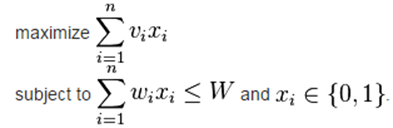


## WORK DURING THE LAB
1.	Exhaustive search: generate all possible binary strings of size N and print them on the screen. Test the code for different values of N.
2.	Read data for the knapsack problem.
3.	Generate a random solution for the knapsack problem and verify its quality.

**Points for the work during the lab: 25p**


In [2]:

def load_data(file_name: str) -> "list[tuple[int, int]], int, int":
    weights_and_values = []
    with open(file_name) as f:
        lines = f.readlines()
        num_items = int(lines[0].strip())
        for line in lines[1:num_items + 1]:
            parts = line.split()
            weight, value = int(parts[1]), int(parts[2])
            weights_and_values.append((weight, value))
        capacity = int(lines[num_items + 1].strip())
    return weights_and_values, capacity, num_items

# Read the 20 item knapsack file
data, capacity, num_items = load_data("data/knapsack/knapsack-20.txt")
print("Nr of items: " + str(num_items))
print ("Capacity: " + str(capacity))
print("Data: ")
print(data)


Nr of items: 20
Capacity: 524
Data: 
[(91, 29), (60, 65), (61, 71), (9, 60), (79, 45), (46, 71), (19, 22), (57, 97), (8, 6), (84, 91), (20, 57), (72, 60), (32, 49), (31, 89), (28, 2), (81, 30), (55, 90), (43, 25), (100, 82), (27, 19)]


## WORK DURING THE LAB
1.	Exhaustive search: generate all possible binary strings of size N and print them on the screen. Test the code for different values of N.

In [3]:
def generate_binary_string(n : int) -> "list[str]":
    """
    Generate all binary strings of length n
    Input:
        n: int, length of binary string 
    Output:
        list of binary strings
    """
    if n == 0:
        return ['']
    return ['0' + s for s in generate_binary_string(n - 1)] + ['1' + s for s in generate_binary_string(n - 1)]


# Test for n=1..5 and add results to a dictionary
results = {}
for i in range(1, 5):
    results[i] = generate_binary_string(i)
    
# Print dictionary of results
results

{1: ['0', '1'],
 2: ['00', '01', '10', '11'],
 3: ['000', '001', '010', '011', '100', '101', '110', '111'],
 4: ['0000',
  '0001',
  '0010',
  '0011',
  '0100',
  '0101',
  '0110',
  '0111',
  '1000',
  '1001',
  '1010',
  '1011',
  '1100',
  '1101',
  '1110',
  '1111']}

## WORK DURING THE LAB
3. Generate a random solution for the knapsack problem and verify its quality.

In [4]:
import random

def generate_random_solution(num_items: int) -> "list[int]":
    """
    Generate a random list of 0s and 1s
    Input:
        num_items: int, number of items
    Output:
        list of 0s and 1s 
    """
    return [random.randint(0, 1) for _ in range(num_items)]

def eval_sol(random_sol, data, capacity):
    """
    Evaluate the solution
    Input:
        random_sol: list of 0s and 1s
        data: list of tuples with weights and values
        capacity: int, max capacity of the knapsack
    Output:
        string indicating validity and quality of the solution
    """
    weight = 0
    value = 0
    for i in range(len(random_sol)):
        if random_sol[i] == 1:
            weight += data[i][0]
            value += data[i][1]
    
    if weight > capacity:
        return f"Invalid solution with weight: {weight} exceeding max capacity: {capacity}"
    else: 
        return f"Valid solution with weight: {weight} and value: {value}"

random_sol = generate_random_solution(num_items)

print(random_sol)
print(eval_sol(random_sol, data, capacity))

[0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1]
Valid solution with weight: 462 and value: 586


##	ASSIGNMENT A1
1.	Implement a random search method for the knapsack problem.
 1.	From k random solutions, the method should return the best one.
 1.	Test the method for different values of k.
 1.	Perform experiments for knapsack instances of size 20 and 200.
1.	Submit source code and report.

**Deadline to submit A1: Lab 2**
**Points for A1: 25p**


## Idea
- Generate random solution
- Find its fitness value (total value of the solution)
- Verify if the solution is valid (total weight of the solution is less than the capacity)
- Repeat the above steps k times
- Return the best solution (random search method)
- Run the random search method n times
- Perform experiments for knapsack instances of size 20 and 200 (prints, plots, etc..)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_solution(n: int):
    """
        Generate solution of length n using binary encoding
        Input:
          n: int
        Output:
          sol: list
              - binary encoding solution
    """
    return list(np.random.randint(2, size=n))

def fitness(solution: list[int], data: list[tuple[int, int]], capacity: int) -> tuple[int, int]:
    """
    Fitness function to evaluate the solution for the knapsack problem by calculating the total weight and value of the solution
    Input:
        solution: list of 0s and 1s representing the inclusion of items
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
    Output:
        total weight, total value of solution
    """
    total_value = 0
    total_weight = 0
    
    for i in range(len(solution)):
        if solution[i] == 1:
            total_value += data[i][1]
            total_weight+= data[i][0]
    
    return total_weight, total_value

def is_valid(solution: list[int], data: list[tuple[int, int]], capacity: int) -> bool:
    """
    Check if the solution is valid by checking if the total weight of the solution is less than the capacity
    Input:
        solution: list of 0s and 1s representing the inclusion of items
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
    Output:
        bool: True if the solution is valid, False otherwise
    """
    weight = fitness(solution, data, capacity)[0]
    
    return weight <= capacity

def generate_valid_sol(data: list[tuple[int, int]], capacity: int) -> list[int]:
    """
    Generate a valid solution by generating random solutions until a valid solution is found
    Input:
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
    Output:
        list: a valid solution
    """
    while True:
        solution = generate_solution(len(data))
        if is_valid(solution, data, capacity):
            return solution
        
def generate_k_valid_sol(data: list[tuple[int, int]], capacity: int, k: int) -> list[list[int]]:
    """
    Generate k valid solutions
    Input:
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
        k: int, number of solutions to generate
    Output:
        list: k valid solutions
    """
    return [generate_valid_sol(data, capacity) for _ in range(k)]

def random_search(data: list[tuple[int, int]], capacity: int, k: int) -> tuple[list[int], tuple[int, int]]:
    """
    Random search method for the knapsack problem
    Input:
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
        k: int, number of solutions to generate
    Output:
        tuple: best solution and its fitness value
    """
    solutions = generate_k_valid_sol(data, capacity, k)
    best_solution = None
    best_fitness_value = -1

    for solution in solutions:
        current_fitness = fitness(solution, data, capacity)
        if current_fitness[1] > best_fitness_value:
            best_solution = solution
            best_fitness_value = current_fitness[1]
        elif current_fitness[1] == best_fitness_value and current_fitness[0] < fitness(best_solution, data, capacity)[0]:
            best_solution = solution

    return best_solution, fitness(best_solution, data, capacity)

def random_search_n_times(data: list[tuple[int, int]], capacity: int, k: int, n: int) -> list[tuple[list[int], tuple[int, int]]]:
    """
    Run the random search method n times
    Input:
        data: list of tuples where each tuple contains (weight, value) of an item
        capacity: int, maximum capacity of the knapsack
        k: int, number of solutions to generate
        n: int, number of times to run the random search
    Output:
        list: best solutions and their fitness values for each run
    """
    
    # Store the best solutions and their fitness values for each run
    return [random_search(data, capacity, k) for _ in range(n)]
    
def get_average_value_solutions(solutions: list[tuple[list[int], tuple[int, int]]]) -> float:
    """
    Get the average value of the solutions
    Input:
        solutions: list of tuples where each tuple contains a solution and its fitness value
    Output:
        float: average value of the solutions
    """
    total_value = 0
    for solution in solutions:
        total_value += solution[1][1]
    avg = total_value / len(solutions)
    
    # Round to 2 decimals for better readability
    return round(avg, 2)

def get_max_sol(solutions: list[tuple[list[int], tuple[int, int]]]) -> tuple[list[int], int]:
    """ 
    Return the maximum solution with its value
    Input:
        solutions: list of tuples where each tuple contains a solution and its fitness value
    Output:
        list: the maximum solution, int: maximum value
    """
    max_sol = None
    max_value = -1
    for solution in solutions:
        if solution[1][1] > max_value:
            max_sol = solution[0]
            max_value = solution[1][1]
    return max_sol, max_value

def plot_max_avg_values(list_for_plt):
    """
    Plot the maximum value and average values of the solutions against the number of solutions generated.
    Input:
        list_for_plt: list of tuples where each tuple contains the number of solutions, maximum value, and average value
    """
    k_values = [x[0] for x in list_for_plt]
    max_values = [x[1] for x in list_for_plt]
    avg_values = [x[2] for x in list_for_plt]

    plt.plot(k_values, max_values, marker='o', linestyle=':', color='blue', label='Maximum Value')
    plt.plot(k_values, avg_values, marker='o', linestyle='-', color='red', label='Average Value')
    plt.title('Random Search N Times Results')
    plt.xlabel('Number of Solutions (k)')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
def mark_down_table_stats(n_values, k_values, max_and_avg_list):
    """
    Create a markdown table for the maximum and average values of the solutions
    Input:
        n_values: list of n values
        k_values: list of k values
        max_and_avg_list: list of tuples where each tuple contains the maximum and average values of the solutions
    Output:
        string for markdown table
    """
    table = "| n | k | Maximum Value | Average Value |\n"
    table += "|---|---|---------------|---------------|\n"
    index = 0
    for n in n_values:
        for k in k_values:
            max_value, avg_value = max_and_avg_list[index]
            table += f"| {n} | {k} | {max_value} | {avg_value} |\n"
            index += 1
    print(table)
    
import csv

def save_results_to_csv(file_name, n_values, k_values, max_and_avg_list):
    """
    Save the results of the experiments to a CSV file.
    
    Input:
    file_name (str): The name of the output CSV file.
    n_values (list[int]): List of n values.
    k_values (list[int]): List of k values.
    max_and_avg_list (list[tuple[int, float]]): List of tuples containing maximum and average values.
    """
    with open(file_name, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["n", "k", "Maximum Value", "Average Value"])
        index = 0
        for n in n_values:
            for k in k_values:
                max_value, avg_value = max_and_avg_list[index]
                writer.writerow([n, k, max_value, avg_value])
                index += 1
        writer.writerow([])


## Tests for knapsack instances of size 20

The data set: [(91, 29), (60, 65), (61, 71), (9, 60), (79, 45), (46, 71), (19, 22), (57, 97), (8, 6), (84, 91), (20, 57), (72, 60), (32, 49), (31, 89), (28, 2), (81, 30), (55, 90), (43, 25), (100, 82), (27, 19)]
The capacity: 524
The number of items: 20 

Best solution for k = 5 and n = 1000:
Best solution: [0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1] having a value of 744
Average value of the solutions: 565.17 

Best solution for k = 15 and n = 1000:
Best solution: [0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1] having a value of 776
Average value of the solutions: 613.72 

Best solution for k = 50 and n = 1000:
Best solution: [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0] having a value of 787
Average value of the solutions: 655.59 

Best solution for k = 100 and n = 1000:
Best solution: [0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0] having a value of 779
Average value of the solutions: 675.89 

Best solution for k = 1000 and n

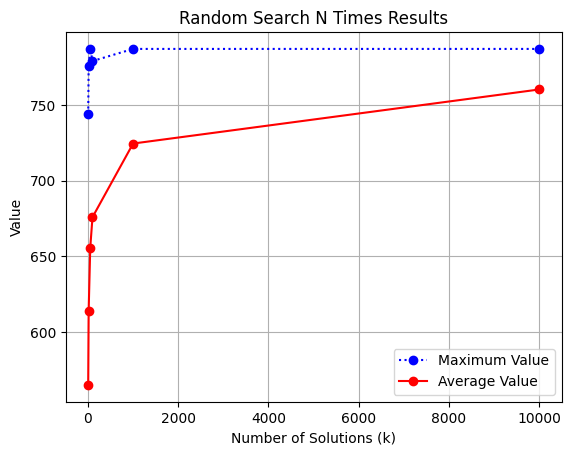

In [9]:
data, capacity, num_items = load_data('data/knapsack/knapsack-20.txt')
print(f"The data set: {data}")
print(f"The capacity: {capacity}")
print(f"The number of items: {num_items} \n")

# Test the random search method for different values of k
k_values = [5, 15, 50, 100, 1000, 10000]

n = 1000

list_for_plt = []

for k in k_values:
    best_solutions = random_search_n_times(data, capacity, k, n)
    print(f"Best solution for k = {k} and n = {n}:")
    best_sol, max_value = get_max_sol(best_solutions)
    avg_value = get_average_value_solutions(best_solutions)
    print(f"Best solution: {best_sol} having a value of {max_value}")
    print(f"Average value of the solutions: {avg_value} \n")
    list_for_plt.append([k, max_value, avg_value])
    
plot_max_avg_values(list_for_plt)

In [26]:
n_values = [10, 20, 30]
k_values = [5, 15, 50, 100]

max_and_avg_list = []
for n in n_values:
    for k in k_values:
        best_solutions = random_search_n_times(data, capacity, k, n)
        avg_value = get_average_value_solutions(best_solutions)
        _, max_value = get_max_sol(best_solutions)
        max_and_avg_list.append((max_value, avg_value))

mark_down_table_stats(n_values, k_values, max_and_avg_list)

save_results_to_csv("knapsack_results_20.csv", n_values, k_values, max_and_avg_list)

| n | k | Maximum Value | Average Value |
|---|---|---------------|---------------|
| 10 | 5 | 653 | 575.0 |
| 10 | 15 | 678 | 603.9 |
| 10 | 50 | 756 | 668.8 |
| 10 | 100 | 721 | 666.9 |
| 20 | 5 | 719 | 574.85 |
| 20 | 15 | 670 | 603.9 |
| 20 | 50 | 719 | 658.3 |
| 20 | 100 | 730 | 682.4 |
| 30 | 5 | 689 | 558.13 |
| 30 | 15 | 713 | 614.73 |
| 30 | 50 | 723 | 660.33 |
| 30 | 100 | 740 | 683.47 |


| n | k | Maximum Value | Average Value |
|---|---|---------------|---------------|
| 10 | 5 | 653 | 575.0 |
| 10 | 15 | 678 | 603.9 |
| 10 | 50 | 756 | 668.8 |
| 10 | 100 | 721 | 666.9 |
| 20 | 5 | 719 | 574.85 |
| 20 | 15 | 670 | 603.9 |
| 20 | 50 | 719 | 658.3 |
| 20 | 100 | 730 | 682.4 |
| 30 | 5 | 689 | 558.13 |
| 30 | 15 | 713 | 614.73 |
| 30 | 50 | 723 | 660.33 |
| 30 | 100 | 740 | 683.47 |


## Tests for knapsack instances of size 200

The data set: [(835, 735), (1670, 1470), (3340, 2940), (1087, 987), (1087, 987), (517, 417), (1034, 834), (2068, 1668), (1034, 834), (630, 530), (1260, 1060), (1260, 1060), (1071, 971), (165, 65), (330, 130), (495, 195), (176, 76), (663, 563), (1326, 1126), (1326, 1126), (984, 884), (1968, 1768), (2952, 2652), (829, 729), (1658, 1458), (3316, 2916), (829, 729), (663, 563), (1326, 1126), (1989, 1689), (1086, 986), (1086, 986), (639, 539), (1278, 1078), (2556, 2156), (1917, 1617), (895, 795), (1790, 1590), (3580, 3180), (888, 788), (1776, 1576), (3552, 3152), (2664, 2364), (232, 132), (464, 264), (928, 528), (464, 264), (472, 372), (944, 744), (691, 591), (1382, 1182), (2764, 2364), (1052, 952), (1052, 952), (1057, 957), (2114, 1914), (2114, 1914), (456, 356), (912, 712), (651, 551), (1302, 1102), (1953, 1653), (711, 611), (1422, 1222), (1042, 942), (232, 132), (464, 264), (696, 396), (1099, 999), (1099, 999), (1029, 929), (2058, 1858), (4116, 3716), (139, 39), (297, 197), (602, 502), (6

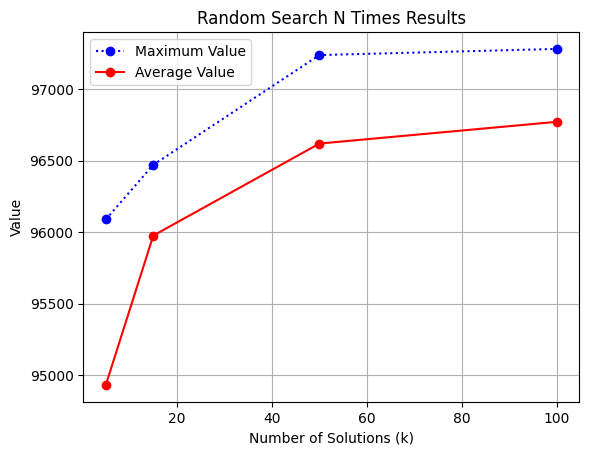

In [27]:
data, capacity, num_items = load_data('data/knapsack/rucsac-200.txt')
print(f"The data set: {data}")
print(f"The capacity: {capacity}")
print(f"The number of items: {num_items} \n")

k_values = [5, 15, 50, 100]

n = 10

list_for_plt = []

for k in k_values:
    best_solutions = random_search_n_times(data, capacity, k, n)
    print(f"Best solution for k = {k} and n = {n}:")
    best_sol, max_value = get_max_sol(best_solutions)
    avg_value = get_average_value_solutions(best_solutions)
    print(f"Best solution: {best_sol} having a value of {max_value}")
    print(f"Average value of the solutions: {avg_value} \n")
    list_for_plt.append([k, max_value, avg_value])

plot_max_avg_values(list_for_plt)

In [29]:
n_values = [10, 20, 30]
k_values = [5, 15, 50, 100]

max_and_avg_list = []

for n in n_values:
    for k in k_values:
        best_solutions = random_search_n_times(data, capacity, k, n)
        avg_value = get_average_value_solutions(best_solutions)
        _, max_value = get_max_sol(best_solutions)
        max_and_avg_list.append((max_value, avg_value))

mark_down_table_stats(n_values, k_values, max_and_avg_list)

save_results_to_csv("knapsack_results_200.csv", n_values, k_values, max_and_avg_list)

| n | k | Maximum Value | Average Value |
|---|---|---------------|---------------|
| 10 | 5 | 96517 | 95478.1 |
| 10 | 15 | 96930 | 96295.9 |
| 10 | 50 | 97136 | 96587.4 |
| 10 | 100 | 97408 | 96812.9 |
| 20 | 5 | 96957 | 95138.4 |
| 20 | 15 | 97353 | 96086.4 |
| 20 | 50 | 97068 | 96553.75 |
| 20 | 100 | 97265 | 96746.25 |
| 30 | 5 | 96738 | 95401.87 |
| 30 | 15 | 96789 | 96143.2 |
| 30 | 50 | 97466 | 96533.2 |
| 30 | 100 | 97326 | 96779.1 |


| n | k | Maximum Value | Average Value |
|---|---|---------------|---------------|
| 10 | 5 | 96517 | 95478.1 |
| 10 | 15 | 96930 | 96295.9 |
| 10 | 50 | 97136 | 96587.4 |
| 10 | 100 | 97408 | 96812.9 |
| 20 | 5 | 96957 | 95138.4 |
| 20 | 15 | 97353 | 96086.4 |
| 20 | 50 | 97068 | 96553.75 |
| 20 | 100 | 97265 | 96746.25 |
| 30 | 5 | 96738 | 95401.87 |
| 30 | 15 | 96789 | 96143.2 |
| 30 | 50 | 97466 | 96533.2 |
| 30 | 100 | 97326 | 96779.1 |


## Conclusions

**Random Search Method Performance**:
   - The random search method was tested for different values of `k` (number of solutions generated) and `n` (number of times the random search is run).
   - The results show that increasing the values of `k` and `n` generally leads to better solutions, as indicated by higher maximum and average values.

**Comparison Between Knapsack Sizes**:
   - The knapsack instance of size 200 shows significantly higher maximum and average values compared to the instance of size 20.
   - This is expected due to the larger number of items and higher capacity, which allows for more valuable solutions.
    - Time to run the random search method for the knapsack instance of size 200 is higher compared to the instance of size 20.

Overall, the experiments demonstrate the effectiveness of the random search method for solving the knapsack problem, with better results achieved by increasing the number of solutions generated (`k`) and the number of times the search is run (`n`).